## Deep Learning and Reinforcement Learning

### Summary
In this project I used Deep Learning to train some models to classify the CIFAR10 dataset. I used a simple Convolutional Neural Network (CNN) as a baseline, then I used a more complex one, and finally I used a ResNet model, both in trainable and pre-trained versions.

CIFAR10 is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories.
You can see more info at [CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html).

The classes are:
| Label | Description                   |
|-------|-------------------------------|
| 0     | Airplane                      |
| 1     | Automobile                    |
| 2     | Bird                          |
| 3     | Cat                           |
| 4     | Deer                          |
| 5     | Dog                           |
| 6     | Frog                          |
| 7     | Horse                         |
| 8     | Ship                          |
| 9     | Truck                         |



### Data Preparation

In [1]:
# import the necessary packages
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
def data_preprocessing(x_train, x_test, y_train, y_test):
    '''Preprocess the data by scaling the images to the [0, 1] range and converting the class labels to categorical matrices.'''
    # Scale images to the [0, 1] range
    x_train = x_train.astype("float32") / 255
    x_test = x_test.astype("float32") / 255
    print("x_train shape:", x_train.shape)
    print(x_train.shape[0], "train samples")
    print(x_test.shape[0], "test samples")

    # Convert class labels to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    return x_train, x_test, y_train, y_test

In [4]:
x_train, x_test, y_train, y_test = data_preprocessing(x_train, x_test, y_train, y_test)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
# define some hyperparameters
batch_size = 128
epochs = 15

### Simple CNN

Here I used a simple CNN with 2 convolutional layers, 2 max pooling layers, and 1 fully connected layer.

In [6]:
simpleCNN = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ]
)

simpleCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dropout (Dropout)           (None, 2304)              0

In [7]:
simpleCNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

simpleCNN.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
352/352 [==============================] - 10s 9ms/step - loss: 1.7008 - accuracy: 0.3848 - val_loss: 1.4039 - val_accuracy: 0.5020
Epoch 2/15
352/352 [==============================] - 2s 5ms/step - loss: 1.3848 - accuracy: 0.5096 - val_loss: 1.2554 - val_accuracy: 0.5742
Epoch 3/15
352/352 [==============================] - 2s 5ms/step - loss: 1.2852 - accuracy: 0.5494 - val_loss: 1.1639 - val_accuracy: 0.6058
Epoch 4/15
352/352 [==============================] - 2s 7ms/step - loss: 1.2109 - accuracy: 0.5784 - val_loss: 1.1157 - val_accuracy: 0.6254
Epoch 5/15
352/352 [==============================] - 2s 6ms/step - loss: 1.1534 - accuracy: 0.5987 - val_loss: 1.0603 - val_accuracy: 0.6452
Epoch 6/15
352/352 [==============================] - 2s 5ms/step - loss: 1.1161 - accuracy: 0.6119 - val_loss: 1.0213 - val_accuracy: 0.6598
Epoch 7/15
352/352 [==============================] - 2s 5ms/step - loss: 1.0845 - accuracy: 0.6242 - val_loss: 1.0218 - val_accuracy: 0.6570
Epoch

In [8]:
scoreSimpleCNN = simpleCNN.evaluate(x_test, y_test, verbose=0)
print("Test loss:", scoreSimpleCNN[0])
print("Test accuracy:", scoreSimpleCNN[1])

Test loss: 0.9201228618621826
Test accuracy: 0.6869999766349792


### More complex CNN

Here I used a more complex CNN with 3 convolutional layers, 3 max pooling layers, and 1 fully connected layer.

In [9]:
moreComplexCNN = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ]
)

moreComplexCNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 2, 2, 128)        

In [10]:
moreComplexCNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

moreComplexCNN.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
352/352 [==============================] - 4s 7ms/step - loss: 1.8034 - accuracy: 0.3293 - val_loss: 1.4949 - val_accuracy: 0.4598
Epoch 2/15
352/352 [==============================] - 2s 6ms/step - loss: 1.4864 - accuracy: 0.4569 - val_loss: 1.3191 - val_accuracy: 0.5254
Epoch 3/15
352/352 [==============================] - 2s 6ms/step - loss: 1.3611 - accuracy: 0.5078 - val_loss: 1.2589 - val_accuracy: 0.5480
Epoch 4/15
352/352 [==============================] - 2s 5ms/step - loss: 1.2787 - accuracy: 0.5418 - val_loss: 1.1564 - val_accuracy: 0.6010
Epoch 5/15
352/352 [==============================] - 3s 7ms/step - loss: 1.2058 - accuracy: 0.5724 - val_loss: 1.0748 - val_accuracy: 0.6322
Epoch 6/15
352/352 [==============================] - 2s 6ms/step - loss: 1.1504 - accuracy: 0.5963 - val_loss: 1.0219 - val_accuracy: 0.6428
Epoch 7/15
352/352 [==============================] - 2s 6ms/step - loss: 1.1089 - accuracy: 0.6095 - val_loss: 0.9966 - val_accuracy: 0.6588
Epoch 

In [11]:
scoreMoreComplexCNN = moreComplexCNN.evaluate(x_test, y_test, verbose=0)
print("Test loss:", scoreMoreComplexCNN[0])
print("Test accuracy:", scoreMoreComplexCNN[1])

Test loss: 0.8736333847045898
Test accuracy: 0.6983000040054321


### ResNet - from scratch

Here I used a ResNet model with 50 layers. The model was trained for 15 epochs from scratch.

In [12]:
resNet = keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=input_shape,
    pooling=None,
    classes=num_classes,
)

resNet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [13]:
resNet.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

resNet.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
352/352 [==============================] - 68s 85ms/step - loss: 1.8489 - accuracy: 0.3831 - val_loss: 2.9042 - val_accuracy: 0.1306
Epoch 2/15
352/352 [==============================] - 25s 71ms/step - loss: 1.6184 - accuracy: 0.4521 - val_loss: 2.1957 - val_accuracy: 0.3110
Epoch 3/15
352/352 [==============================] - 25s 71ms/step - loss: 1.3657 - accuracy: 0.5260 - val_loss: 2.1312 - val_accuracy: 0.3100
Epoch 4/15
352/352 [==============================] - 25s 71ms/step - loss: 1.6978 - accuracy: 0.4362 - val_loss: 13.8622 - val_accuracy: 0.2194
Epoch 5/15
352/352 [==============================] - 25s 71ms/step - loss: 1.3716 - accuracy: 0.5223 - val_loss: 3.4001 - val_accuracy: 0.2028
Epoch 6/15
352/352 [==============================] - 26s 73ms/step - loss: 1.5254 - accuracy: 0.4882 - val_loss: 3.4924 - val_accuracy: 0.4114
Epoch 7/15
352/352 [==============================] - 25s 71ms/step - loss: 1.5199 - accuracy: 0.4894 - val_loss: 2.0356 - val_accuracy

In [14]:
scoreResNet = resNet.evaluate(x_test, y_test, verbose=0)
print("Test loss:", scoreResNet[0])
print("Test accuracy:", scoreResNet[1])

Test loss: 1.8781708478927612
Test accuracy: 0.3571999967098236


### ResNet - fine-tuning

I also tried Resnet50, a pre-trained model that was trained on the ImageNet dataset. It has 50 layers and it is a very deep model. It is a very powerful model and it is able to achieve very high accuracy.
I used the pre-trained model and fine-tuned it on the CIFAR10 dataset for 15 epochs.

In [17]:
backbone = keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',             # ImageNet weights
    input_tensor=None,
    input_shape=(32, 32, 3),
    pooling=None
)

resnet50 = keras.models.Sequential()
resnet50.add(backbone)
resnet50.add(keras.layers.Flatten())
resnet50.add(keras.layers.Dense(10, activation='softmax'))

In [22]:
resnet50.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

resnet50.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
352/352 [==============================] - 55s 73ms/step - loss: 1.2343 - accuracy: 0.6080 - val_loss: 4.8275 - val_accuracy: 0.1300
Epoch 2/15
352/352 [==============================] - 25s 71ms/step - loss: 0.9923 - accuracy: 0.6962 - val_loss: 6.7086 - val_accuracy: 0.1350
Epoch 3/15
352/352 [==============================] - 25s 70ms/step - loss: 1.3426 - accuracy: 0.5857 - val_loss: 2.4403 - val_accuracy: 0.3880
Epoch 4/15
352/352 [==============================] - 25s 70ms/step - loss: 0.9930 - accuracy: 0.6627 - val_loss: 2.6646 - val_accuracy: 0.3618
Epoch 5/15
352/352 [==============================] - 25s 71ms/step - loss: 0.9040 - accuracy: 0.6959 - val_loss: 1.0888 - val_accuracy: 0.6456
Epoch 6/15
352/352 [==============================] - 25s 70ms/step - loss: 0.7815 - accuracy: 0.7332 - val_loss: 1.5161 - val_accuracy: 0.5754
Epoch 7/15
352/352 [==============================] - 25s 70ms/step - loss: 1.3741 - accuracy: 0.5803 - val_loss: 2.0330 - val_accuracy:

In [23]:
resnet50Score = resnet50.evaluate(x_test, y_test, verbose=0)
print("Test loss:", resnet50Score[0])
print("Test accuracy:", resnet50Score[1])

Test loss: 0.7671610116958618
Test accuracy: 0.7487000226974487


### Comparison

In [ ]:
# Define the models and their corresponding test accuracies
models = ['Simple CNN', 'More Complex CNN', 'ResNet - fs', 'ResNet - ft']
test_accuracies = [scoreSimpleCNN[1], scoreMoreComplexCNN[1], scoreResNet[1], resnet50Score[1]]

# Define the colors for the bars
colors = ['blue', 'orange', 'green', 'red']

# Plot the bar chart with different colors
plt.bar(models, test_accuracies, color=colors)
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracies for Different Models')

# Display the accuracy values on the bars
for i, accuracy in enumerate(test_accuracies):
    plt.text(i, accuracy, f'{accuracy:.2%}', ha='center', va='bottom')

# Display the chart
plt.show()

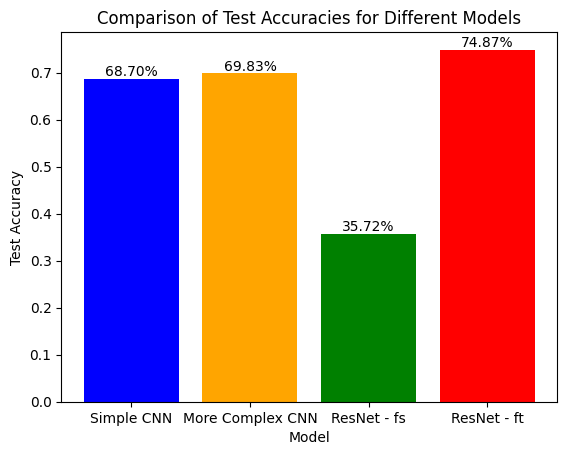

## Conclusion


CIFAR10 is a very challenging dataset. It is very hard to achieve high accuracy on this dataset. The best model I achieved was the fine-tuned ResNet50, with an accuracy of 74.87%. This is a very good result, considering the very low number of epochs and the complexity of the dataset.
One thing that I would like to notice is the poor performance of Resnet50 trained from scratch. Probably, the model is too deep and the number of epochs is too low to train it from scratch with good results.

| Model           | Test Accuracy |
|-----------------|---------------|
| Simple CNN      | 68.70%         |
| More Complex CNN| 69.83%         |
| ResNet - from scratch         | 35.72%         |
| ResNet - fine tuning | 74.87%         |
